# 1. 폴더 정리

* 제공해드린 animals10.zip의 압축을 풀어 그 내용을 살펴보시고, 폴더 구조를 학습에 알맞도록 재구성해주세요
* 특히 각 클래스마다 약 30% 정도의 이미지를 test 폴더에 할당해주세요
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요 (ex. flat_test[:5]로 앞의 다섯값 확인)
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import glob
import shutil

In [3]:
### Guideline for convenience ###
# 압축 풀기

!unzip -qq "/content/drive/MyDrive/dsl/animals10.zip"

In [4]:
animals = os.listdir("/content/Animals-10")
animals = sorted(animals)
animals

['butterfly',
 'cat',
 'chicken',
 'cow',
 'dog',
 'elephant',
 'horse',
 'sheep',
 'spider',
 'squirrel']

In [5]:
# 각 클래스별 파일 개수 확인 -> 변수로 해당 개수 저장
# Tip) 클래스가 10개이므로 각 클래스마다 똑같은 내용의 코드를 계속 써야할까요? 클래스 이름을 리스트로 저장해 for문을 돌리면서 코드를 재사용하는건 어떨까요?

animal_counts = []
animal_lists = []

In [6]:
for animal in animals:
  animal_list = sorted(glob.glob(f'./Animals-10/{animal}/*.*'))
  animal_lists.append(animal_list)
  animal_counts.append(len(animal_list))

In [7]:
for idx, animal in enumerate(animals):
  print(f'{animal}: {animal_counts[idx]}')

butterfly: 2112
cat: 1668
chicken: 3098
cow: 1866
dog: 4863
elephant: 1446
horse: 2623
sheep: 1820
spider: 4821
squirrel: 1862


In [8]:
# test에 넣을 이미지 개수 계산

animal_test_counts = []

for idx, animal in enumerate(animals):
  test_count = round(animal_counts[idx] * 0.3)
  animal_test_counts.append(test_count)

In [9]:
for idx, animal in enumerate(animals):
  print(f'{animal}: {animal_test_counts[idx]}')

butterfly: 634
cat: 500
chicken: 929
cow: 560
dog: 1459
elephant: 434
horse: 787
sheep: 546
spider: 1446
squirrel: 559


In [10]:
# train, test 폴더 경로 선언 & 만들기

train_paths = []
test_paths = []

for animal in animal_list:
  train_path = f'./train/{animal}'
  test_path = f'./test/{animal}'
  train_paths.append(train_path)
  test_paths.append(test_path)
  os.makedirs(train_path, exist_ok=True)
  os.makedirs(test_path, exist_ok=True)

In [11]:
# train, test 폴더로 이미지 split해서 알맞게 집어넣기

import random

def split(img_list, test_count, train_path, test_path):
  # img_list : 이미지 경로 리스트
  # test_count : test에 할당할 이미지 개수
  # train_path : train 데이터 넣을 경로
  # test_path : test 데이터 넣을 경로
  
  # 랜덤으로 test_count만큼 이미지 img_list에서 고르기
  # test 담을 이미지 리스트 저장
  test_files=[]
  for i in random.sample(img_list, test_count):
    test_files.append(i)

  # 위에서 고르지 않은 이미지들을 train 담을 이미지 리스트로 저장
  train_files = [x for x in img_list if x not in test_files]

  # 고른 이미지를 train_path, test_path폴더에 폭사
  for k in train_files:
    shutil.copy(k, train_path)
  
  for c in test_files:
    shutil.copy(c, test_path)

  print('train 폴더 이미지 개수 : {}\ntest 폴더 이미지 개수 : {}'.format(len(glob.glob(train_path+'/*')),len(glob.glob(test_path+'/*'))))

In [12]:
for idx, animal in enumerate(animals):
  split(animal_lists[idx], animal_test_counts[idx], train_paths[idx], test_paths[idx])

train 폴더 이미지 개수 : 1478
test 폴더 이미지 개수 : 634
train 폴더 이미지 개수 : 1168
test 폴더 이미지 개수 : 500
train 폴더 이미지 개수 : 2169
test 폴더 이미지 개수 : 929
train 폴더 이미지 개수 : 1306
test 폴더 이미지 개수 : 560
train 폴더 이미지 개수 : 3404
test 폴더 이미지 개수 : 1459
train 폴더 이미지 개수 : 1012
test 폴더 이미지 개수 : 434
train 폴더 이미지 개수 : 1836
test 폴더 이미지 개수 : 787
train 폴더 이미지 개수 : 1274
test 폴더 이미지 개수 : 546
train 폴더 이미지 개수 : 3375
test 폴더 이미지 개수 : 1446
train 폴더 이미지 개수 : 1303
test 폴더 이미지 개수 : 559


# 2. CNN 모델
수업 코드에 '모델 성능에 대한 고민!!' 부분을 참고해서 **test 이미지 기준 최소 80% 이상**의 모델이 나올 수 있도록 학습을 진행해주세요.
* 중간중간 헷갈리다면 이것저것 확인하는 코드를 거쳐보세요
* 90% 이상의 모델이 이상적이긴 합니다
* 궁금한 점이 있을 경우, 슬랙 질문 채널 활용을 적극 권장합니다.

전반적으로 수업 코드와 비슷하게 짜면 되는데, 생각해봐야 할 것은
* 모든 이미지를 내가 정의하는 하나의 모델에 넣어야함
* 그말은 input 데이터의 차원이 항상 동일해야 된다는 말
* 그런데 과연 내가 가지고 있는 이미지들의 사이즈가 모두 같을까? - 대략 얼마정도 사이즈 가지고 있는지 코드로 확인해보면 더 좋음 (shape 확인)
* 이미지 사이즈를 통일시키기 위해서는 어떻게 해야할까? - transforms의 Resize, RandomCrop 써볼까?
* 동물 이미지에 적합한 Augmentation은 무엇이 있을까?

In [13]:
from PIL import Image

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

(251, 300, 3)


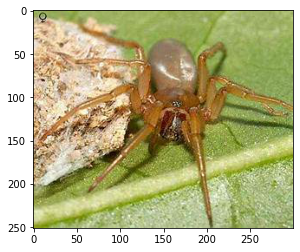

In [15]:
# 이미지 사이즈 확인해보기

img1 = Image.open('/content/Animals-10/spider/spider (1).jpeg')
img1_np = np.array(img1)
imshow(img1_np)
print(img1_np.shape)

(225, 300, 3)


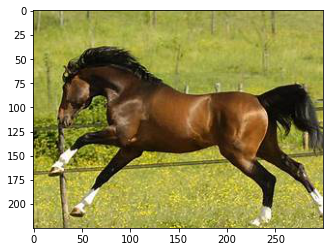

In [16]:
img2 = Image.open('/content/Animals-10/horse/horse (1).jpeg')
img2_np = np.array(img2)
imshow(img2_np)
print(img2_np.shape)

In [17]:
import torch
import torchvision
import torchvision.transforms as transforms

In [18]:
# train, test 이미지를 위한 transforms function 정의
# 위에서 말한 포인트들 생각해보기 - 차원에 유의하자!

transform_train = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.CenterCrop((32, 32)),
    transforms.ColorJitter(brightness=0.2),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.CenterCrop((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

(32, 32, 3)


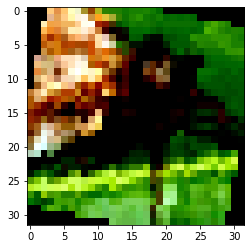

In [19]:
# augmentation 결과 확인하기

img1_aug = transform_train(img1)
img1_aug_np = np.array(img1_aug)
img1_transform = img1_aug_np.transpose(1,2,0)
imshow(img1_transform)
print(img1_transform.shape)

In [20]:
# ImageFolder와 앞서 정의한 transforms function을 활용해 Dataset 객체 (train, test에 대해) 선언

train_data = torchvision.datasets.ImageFolder(
    root = './train',
    transform = transform_train
)

test_data = torchvision.datasets.ImageFolder(
    root = './test',
    transform = transform_test
)

In [21]:
# train, test에 대해 DataLoader 정의

trainloader = torch.utils.data.DataLoader(
    train_data,
    batch_size = 32,      
    shuffle = True,
    num_workers = 2
)

testloader = torch.utils.data.DataLoader(
    test_data,
    batch_size = 32,      
    shuffle = False,
    num_workers = 2
)

In [22]:
### Model 클래스 정의 - 차원에 유의하자!
# 10개의 클래스를 분류해야 하는 꽤나 복잡한 task - 모델 구조를 어느 정도로 복잡하게 짜볼까?
# 가장 마지막 Linear의 out_features는 얼마로 해야할까?

In [23]:
import torch.nn as nn

In [24]:
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()

    self.layer = nn.Sequential(
       nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
       nn.BatchNorm2d(32),
       nn.ReLU(),

       nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
       nn.BatchNorm2d(64),
       nn.ReLU(),
       nn.MaxPool2d(2,2),

       nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
       nn.BatchNorm2d(64),
       nn.ReLU(),
       nn.Dropout(0.3),

       nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
       nn.BatchNorm2d(128),
       nn.ReLU(),
       nn.Dropout(0.4),
       nn.MaxPool2d(2,2),

       nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
       nn.BatchNorm2d(256),
       nn.ReLU(),
       nn.MaxPool2d(2,2),

       nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
       nn.BatchNorm2d(256),
       nn.ReLU(),
       nn.Dropout(0.4),

       nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
       nn.BatchNorm2d(512),
       nn.ReLU(),
       nn.Dropout(0.4),
       nn.MaxPool2d(2,2),
    )

    self.fc_layer=nn.Sequential(
        nn.Linear(512 * 2 * 2, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Dropout(0.4),
        nn.Linear(512,10)
    )

  def forward(self,x):
    out = self.layer(x)
    out = out.view(out.size(0),-1)
    out = self.fc_layer(out)
    return out

In [25]:
# torchsummary로 모델 차원 어떻게 나오는지 돌려보기

from torchsummary import summary

In [26]:
test_model = MyModel()
summary(test_model, (3, 32, 32), batch_size=32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 32, 32]             896
       BatchNorm2d-2           [32, 32, 32, 32]              64
              ReLU-3           [32, 32, 32, 32]               0
            Conv2d-4           [32, 64, 32, 32]          18,496
       BatchNorm2d-5           [32, 64, 32, 32]             128
              ReLU-6           [32, 64, 32, 32]               0
         MaxPool2d-7           [32, 64, 16, 16]               0
            Conv2d-8           [32, 64, 16, 16]          36,928
       BatchNorm2d-9           [32, 64, 16, 16]             128
             ReLU-10           [32, 64, 16, 16]               0
          Dropout-11           [32, 64, 16, 16]               0
           Conv2d-12          [32, 128, 16, 16]          73,856
      BatchNorm2d-13          [32, 128, 16, 16]             256
             ReLU-14          [32, 128,

In [27]:
# Device 선언 (GPU 권장)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [28]:
# 모델 객체 선언

mymodel = MyModel().to(device)
mymodel

MyModel(
  (layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Dropout(p=0.3, inplace=False)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU()
    (14): Dropout(p=0.4, inplace=False)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fa

In [29]:
# loss func, optimizer 정의

criterion = nn.CrossEntropyLoss().to(device) 
optimizer = torch.optim.Adam(mymodel.parameters(), lr=0.001, weight_decay=0.0001)

In [30]:
seq_train_loss = []
seq_test_loss = []
seq_train_acc = []
seq_test_acc = []

In [31]:
# train 함수 정의

def train(epoch):
  print(f'\n[ Train epoch: {epoch+1} ]')
  mymodel.train()

  running_loss = 0.0
  batch_losses=[]
  total = 0
  correct = 0

  for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device) # dataloader의 input image와 label도 device에 넣어줘야됨
        
        # DL 학습 기본 코드
        optimizer.zero_grad() # gradient 초기화
        outputs = mymodel(inputs) # 현재 batch의 inputs을 모델에 넣어 outputs 추출 (확률값)
        loss = criterion(outputs, targets) # 추출한 outputs와 원래 label인 targets 사이 loss 계산
        loss.backward() # 계산한 loss 기반으로 gradient 값 계산
        optimizer.step() # weight parameter update

        total += targets.size(0) # batch 데이터 개수 더하기
        running_loss += loss.item()
        batch_losses.append(loss.item())
        
        _, predicted = outputs.max(1) # 확률값 가장 높게 나타난 클래스
        correct += (predicted == targets).sum().item() # 현재 batch 내에서 알맞게 분류한 이미지 개수 더하기
            
  avg_loss = sum(batch_losses) / len(batch_losses)
  seq_train_loss.append(avg_loss)
  seq_train_acc.append(100*correct/total)
  print('\nTotal train accuarcy:', 100. * correct / total) # 전체 데이터 개수에서 맞게 예측한 비율
  print('Total train loss:', avg_loss)

In [32]:
# test 함수 정의

def test(epoch):
    print(f'\n[ Test epoch: {epoch+1} ]')

    mymodel.eval() # eval은 항상 이걸 지정하고 시작! - Dropout, Batch Normalization 등의 효과를 적용하지 않기 위함!
                   # ex. evaluation 할때는 Dropout 없이 지금까지 학습한 모든 node를 활용해서 진행해야됨

    loss = 0
    batch_losses = []
    correct = 0
    total = 0

    with torch.no_grad(): # gradient update 안함 - eval과 torch.no_grad는 하나의 세트
        for batch_idx, (inputs, targets) in enumerate(testloader):
            inputs, targets = inputs.to(device), targets.to(device)

            outputs = mymodel(inputs)
            loss = criterion(outputs, targets)
            batch_losses.append(loss.item())

            total += targets.size(0)
            _, predicted = outputs.max(1)
            correct += (predicted == targets).sum().item()

    avg_loss = sum(batch_losses) / len(batch_losses)
    seq_test_loss.append(avg_loss)
    seq_test_acc.append(100 * correct / total)
    print('\nTest accuarcy:', 100. * correct / total)
    print('Test average loss:', avg_loss)

In [33]:
# training

num_epoch = 10

for epoch in range(0, num_epoch):
    train(epoch)
    test(epoch)


[ Train epoch: 1 ]

Total train accuarcy: 99.62346521145976
Total train loss: 0.023448596784512204

[ Test epoch: 1 ]

Test accuarcy: 100.0
Test average loss: 4.4991372161769884e-05

[ Train epoch: 2 ]

Total train accuarcy: 100.0
Total train loss: 0.00038715333910049454

[ Test epoch: 2 ]

Test accuarcy: 100.0
Test average loss: 3.934238373226324e-05

[ Train epoch: 3 ]

Total train accuarcy: 100.0
Total train loss: 0.0003100271964726895

[ Test epoch: 3 ]

Test accuarcy: 100.0
Test average loss: 7.94580262116482e-05

[ Train epoch: 4 ]

Total train accuarcy: 100.0
Total train loss: 0.0003069163713086946

[ Test epoch: 4 ]

Test accuarcy: 100.0
Test average loss: 9.334305666821982e-05

[ Train epoch: 5 ]

Total train accuarcy: 100.0
Total train loss: 0.0003205779093948728

[ Test epoch: 5 ]

Test accuarcy: 100.0
Test average loss: 0.00018074302159782642

[ Train epoch: 6 ]

Total train accuarcy: 100.0
Total train loss: 0.0003081080888003439

[ Test epoch: 6 ]

Test accuarcy: 100.0
Te

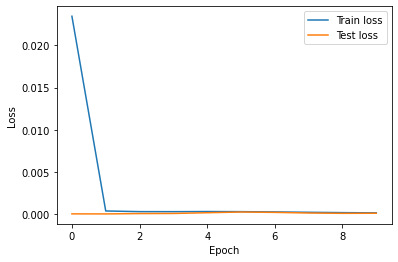

In [35]:
# loss, accuracy 추이 확인 with plt.plot

plt.plot(range(num_epoch), seq_train_loss, label="Train loss")
plt.plot(range(num_epoch), seq_test_loss, label="Test loss")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

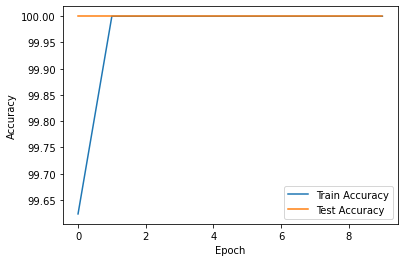

In [36]:
plt.plot(range(num_epoch), seq_train_acc, label="Train Accuracy")
plt.plot(range(num_epoch), seq_test_acc, label="Test Accuracy")
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()